<a href="https://colab.research.google.com/github/HazalAtis/diabetes-prediction-ml-project/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## **Problem Statement**

Diabetes is a growing public health concern affecting millions of people worldwide. Early detection and intervention can prevent severe complications such as **cardiovascular disease**, **kidney failure**, and **blindness**. However, timely diagnosis is often challenged by limited clinical resources, especially in underserved populations.

This project aims to build a machine learning model that predicts whether an individual is likely to have diabetes based on structured health indicators. The model will be trained on a large-scale dataset derived from the U.S. CDC Behavioral Risk Factor Surveillance System (BRFSS), which includes both demographic and lifestyle-related features.

By leveraging this dataset and applying supervised learning techniques, the goal is to assist healthcare providers and public health organizations in identifying high-risk individuals and prioritizing preventive care.

## **Background Context**

Diabetes is a chronic condition that occurs when the body cannot effectively regulate blood sugar levels. According to the World Health Organization (WHO), the global prevalence of diabetes has nearly doubled over the past few decades, making it a major cause of premature illness and death. In many cases, diabetes remains undiagnosed until complications arise.

The Centers for Disease Control and Prevention (CDC) collects annual data through the Behavioral Risk Factor Surveillance System (BRFSS), one of the largest ongoing public health surveys in the world. This dataset captures critical health indicators such as physical activity, BMI, cholesterol, blood pressure, and other lifestyle factors.

By applying machine learning to this rich dataset, we can develop predictive models that help identify individuals at risk of developing diabetes, thereby supporting early diagnosis, targeted interventions, and improved healthcare outcomes.

## **Stakeholders**

The following stakeholders would benefit from a machine learning model that predicts diabetes risk:

1. **Patients**: Gain awareness of their personal risk level and take preventive
action.

2. **Doctors and Clinicians**: Use predictions as a decision-support tool to guide screening and diagnosis.

3. **Public Health Agencies**: Identify high-risk population groups and allocate resources more effectively.

4. **Health Insurers**: Forecast healthcare costs and design preventive programs.

5. **Data Scientists and Health Researchers**: Use insights to study trends and improve future models.

# **Necessary Libraries**

In [9]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [1]:
!pip install -U -q pydrive2
!pip install xgboost lightgbm

# **Dataset Source & Upload**

## **Authenticate and create the PyDrive client**

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## **Dataset Source**

**Dataset**: Diabetes Health Indicators  
**Source**: [Kaggle - Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)  
**File**: `diabetes_binary_health_indicators_BRFSS2015.csv`  
**Format**: CSV  


## **Upload the Dataset**

In [6]:
file_id = '18-e0b7FbQ7R3nslPxOz6BfFy4mKAcXJvSUz6sKlC6Hk'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('healthcare_dataset.csv', mimetype='text/csv')  # Downloads the file to your Colab environment
# Assuming 'df' is your DataFrame, load the downloaded CSV
df = pd.read_csv('healthcare_dataset.csv')

# **Dataset Analysis, Exploration & Overview**

## **Check Dataset Shape**

In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
df.head()

Rows: 253680
Columns: 22


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## **Feature Categorization**

In [ ]:
# List of column names
columns = df.columns.tolist()

# Manual categorization based on data understanding
numerical_features = [
    'BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'
]

binary_features = [col for col in df.columns if df[col].nunique() == 2 and col != 'diabetes_binary']

target_feature = ['diabetes_binary']

# Print categorized features
print("Numerical Features:", numerical_features)
print("Binary Features:", binary_features)
print("Target Feature:", target_feature)


Numerical Features: ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Binary Features: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Target Feature: ['diabetes_binary']


**Feature Categorization**

- **Numerical Features**: BMI, Mental Health Days, Physical Health Days, Age, Education Level, Income  
- **Binary Features**: HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Sex  
- **Target**: `diabetes_binary` (1 = Has Diabetes, 0 = No Diabetes)

## **View Column Names and Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

## **Basic Statistics Summary**

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## **Check Class Balance (Target Distribution)**

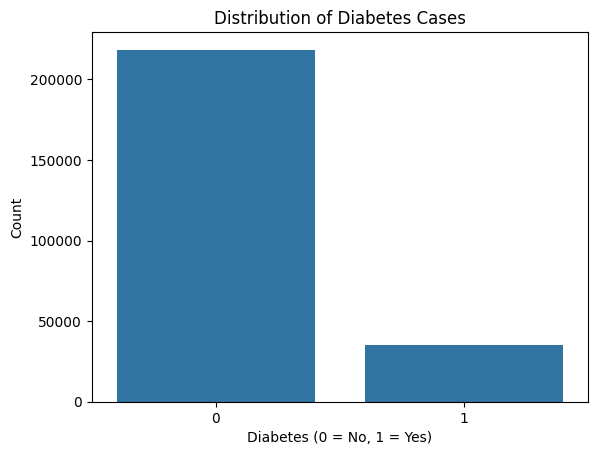

In [ ]:
sns.countplot(x='Diabetes_binary', data=df)
plt.title("Distribution of Diabetes Cases")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## **Unique Values in Each Column**

In [ ]:
df.nunique()

,0
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


## **Correlation Matrix**

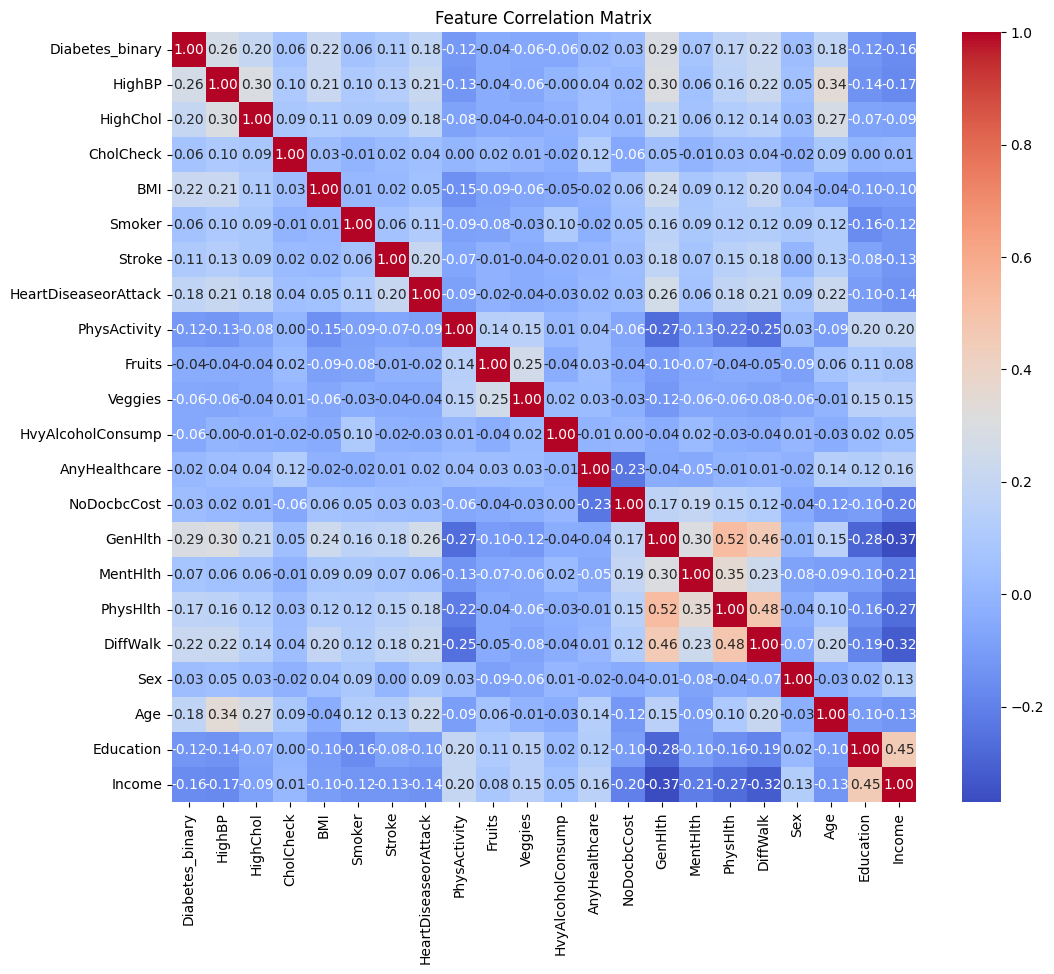

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

## **Dataset Overview Figure**

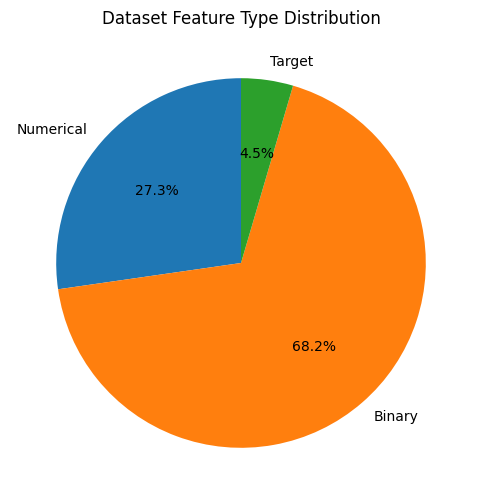

In [ ]:
feature_counts = {
    'Numerical': len(numerical_features),
    'Binary': len(binary_features),
    'Target': 1
}

plt.figure(figsize=(6, 6))
plt.pie(feature_counts.values(), labels=feature_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Dataset Feature Type Distribution')
plt.show()

This dataset contains over 250,000 survey records collected by the CDC to monitor health risk behaviors and conditions related to diabetes.

**Rows**: ~253,000  
**Columns**: 22  
**Target Variable**: `diabetes_binary` (1 = diabetes, 0 = no diabetes)  
**Features Include**:
- Demographics: Age, BMI, Education, Income
- Lifestyle: Smoking, Alcohol Use, Physical Activity
- Health Conditions: High BP, High Cholesterol, Stroke, Heart Disease


# **Formulating Analytical and Predictive Questions**

### **Analytical & Predictive Questions**

| #   | Question | Stakeholders | Method Type |
|-----|----------|--------------|-------------|
| 1   | Can we accurately predict diabetes risk using only non-invasive self-reported health indicators? | Patients, Public | Supervised ML – Classification |
| 2   | What are the top 5 most important features for predicting diabetes in this population? | Doctors, Health Analysts | Feature Importance / SHAP |
| 3   | Can we identify clusters of individuals with similar risk profiles for personalized lifestyle recommendations? | Public Health Teams | Unsupervised ML – Clustering |
| 4   | Are people who cannot afford to see a doctor more likely to have undiagnosed diabetes? | Policy Makers | EDA + Logistic Regression |
| 5   | Is there a threshold of BMI or inactivity beyond which diabetes risk spikes? | Health Coaches | EDA + Nonlinear Analysis |
| 6   | How do mental and physical health days correlate with diabetes prevalence? | Psychologists | Correlation + Interaction Effects |
| 7   | Can we predict who is likely to develop diabetes despite having normal BMI? | Doctors, Researchers | Supervised ML – Subgroup Modeling |
| 8   | Which combinations of behaviors (e.g., smoking, inactivity) most strongly predict diabetes? | Lifestyle Apps | Decision Trees + Association Rules |
| 9   | Can we build a model that minimizes false negatives (missed diabetic cases)? | Hospitals, Clinics | Confusion Matrix + Recall Optimization |
| 10  | How does diabetes prevalence vary by income and education levels? | NGOs, Public Health | Grouped EDA + Heatmaps |
| 11  | What health indicators most differentiate men and women with diabetes? | Gender Health Analysts | Subgroup Analysis |
| 12  | Can we simulate the effect of quitting smoking on predicted diabetes risk? | Wellness Programs | Counterfactual Prediction |
| 13  | Is there a subgroup with high diabetes risk but low perceived health issues? | Researchers | Clustering + Logic Filters |
| 14  | How does self-reported general health perception compare with actual diabetes outcomes? | Doctors, Behavioral Scientists | Correlation + Confusion Analysis |


Among the 14 questions, at least 10 can be addressed using supervised machine learning techniques such as logistic regression and random forest classification. 2–3 questions involve unsupervised learning techniques like clustering (KMeans, DBSCAN), while all questions benefit from exploratory data analysis and statistical insights. This mix ensures a comprehensive and stakeholder-relevant analysis of the dataset.


# **Data Cleaning & Preprocessing**

## **Check for Missing Values**

In [ ]:
# Check missing values
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## **Drop Duplicates**

In [ ]:
df.duplicated().sum()  # Show number of duplicate rows
df = df.drop_duplicates()

## **Check Column Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-null  

## **Normalize Numerical Features (optional for linear models)**

If using Logistic Regression, KNN, or SVM, scale continuous features like BMI, Age, Mental/Physical health days.

In [ ]:
scaler = StandardScaler()

# Select only numeric columns you want to scale
num_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Education', 'Income']
df[num_cols] = scaler.fit_transform(df[num_cols])

## **Feature/Target Split**

The **feature/target split** separates your dataset into:

* **`X`** → the input features used to make predictions
* **`y`** → the target variable (`diabetes_binary`) that the model tries to predict.

In [ ]:
# Target variable
y = df['Diabetes_binary']

# Features (drop target)
X = df.drop('Diabetes_binary', axis=1)

## **Train-Test Split**

The **train-test split** divides your data into two parts:

* **Training set** to train the model
* **Test set** to evaluate how well the model performs on unseen data.

In [ ]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Exploratory Data Analysis (EDA)**

## **Target Variable Distribution**

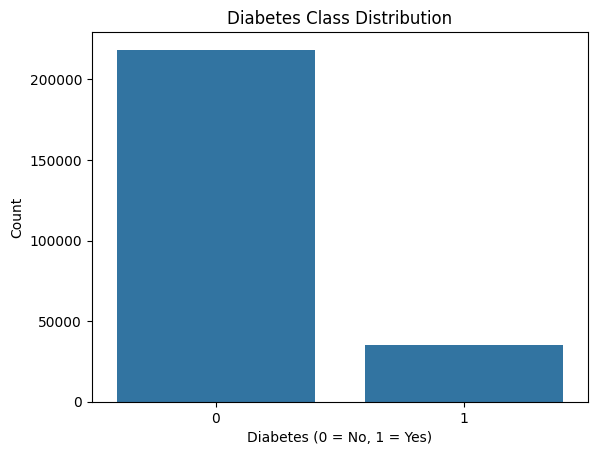

In [ ]:
sns.countplot(x='Diabetes_binary', data=df)
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## **Distribution of Key Numerical Features**

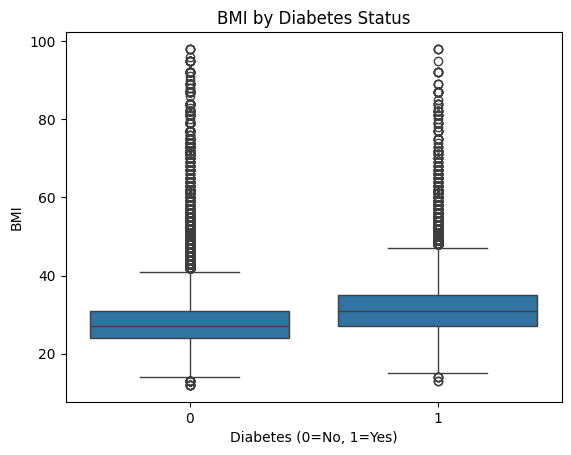

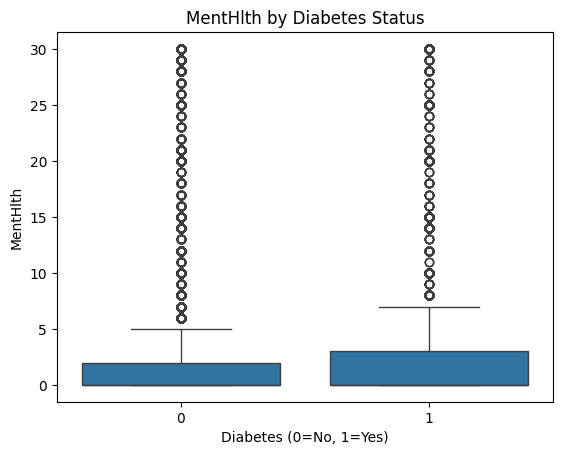

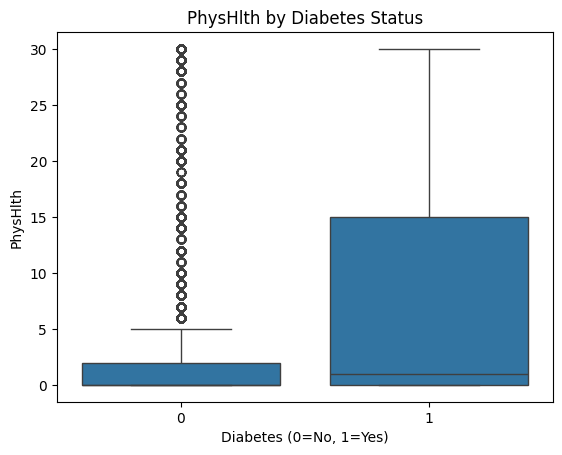

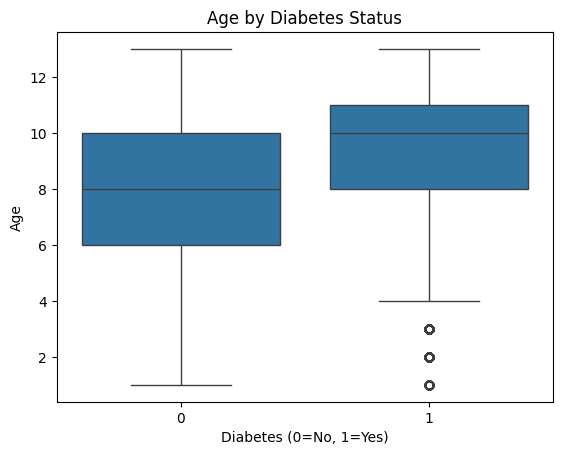

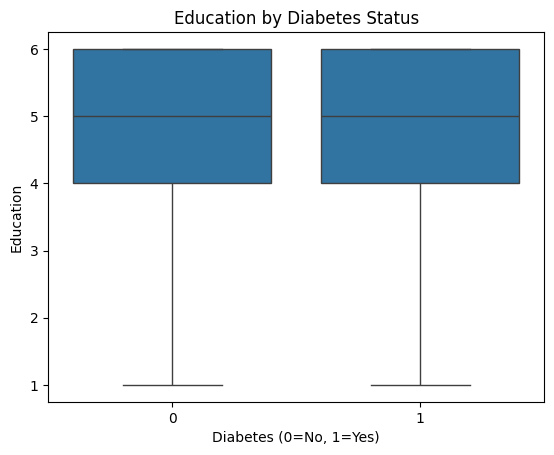

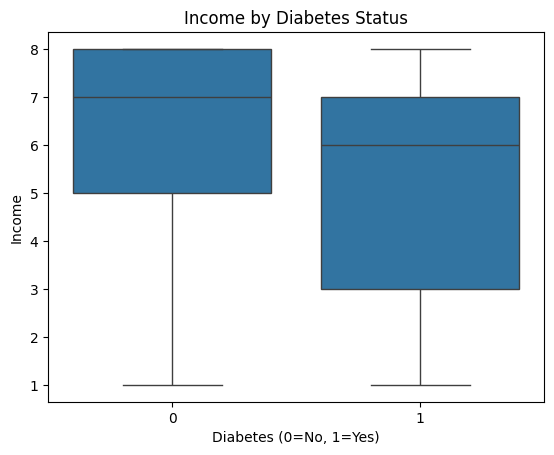

In [ ]:
num_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

for col in num_cols:
    sns.boxplot(x='Diabetes_binary', y=col, data=df)
    plt.title(f"{col} by Diabetes Status")
    plt.xlabel("Diabetes (0=No, 1=Yes)")
    plt.ylabel(col)
    plt.show()

## **PairPlot**

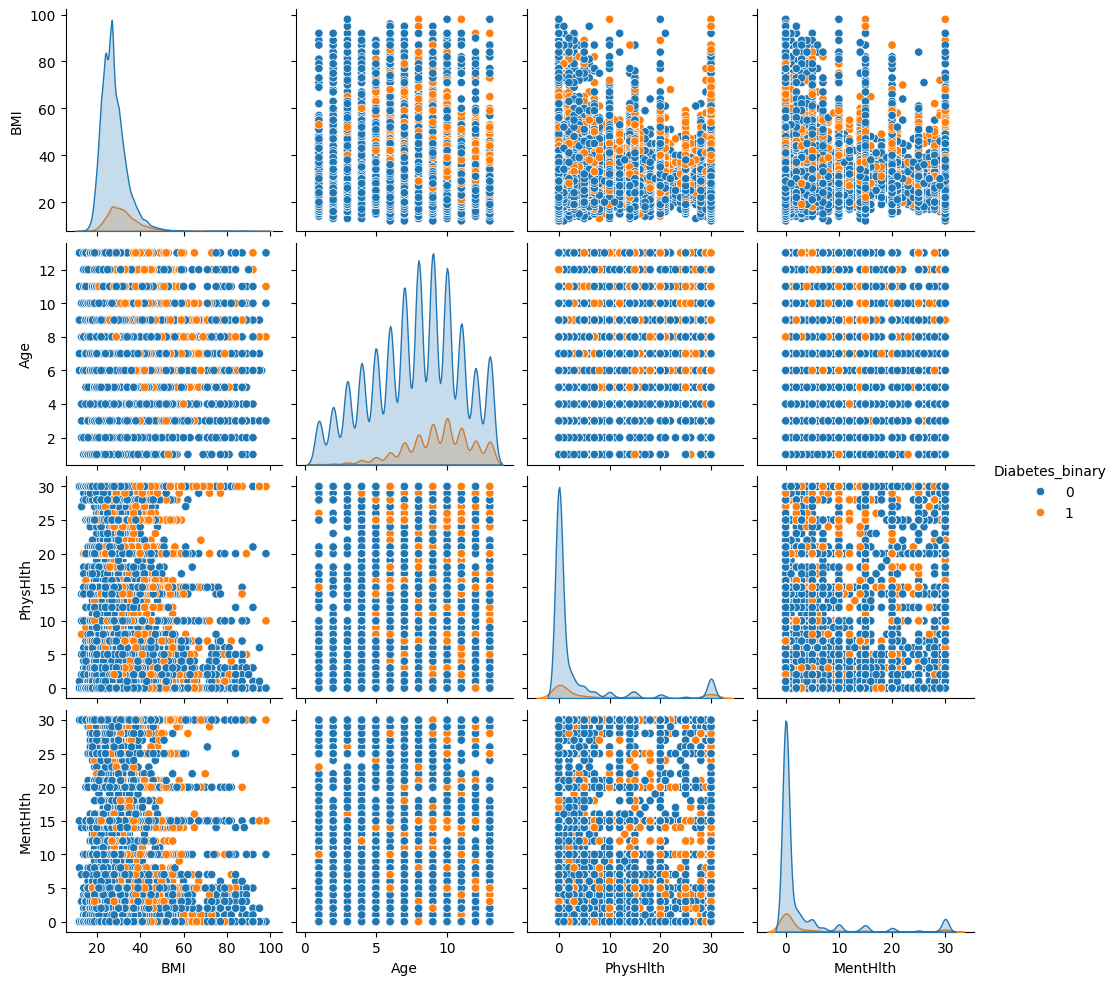

In [ ]:

sns.pairplot(df.sample(200000), hue='Diabetes_binary', vars=['BMI', 'Age', 'PhysHlth', 'MentHlth'])
plt.show()


## **Stacked Bar Charts: Categorical vs Target**

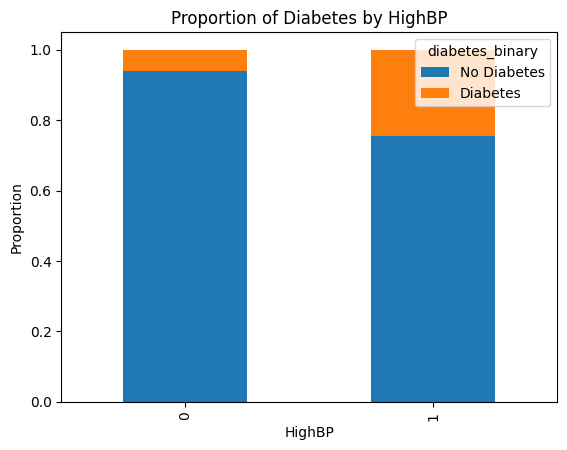

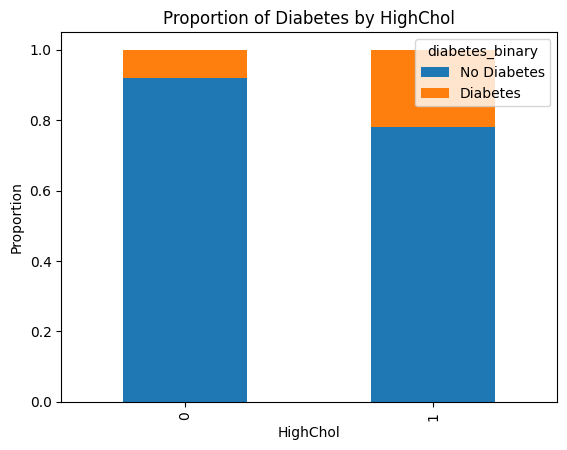

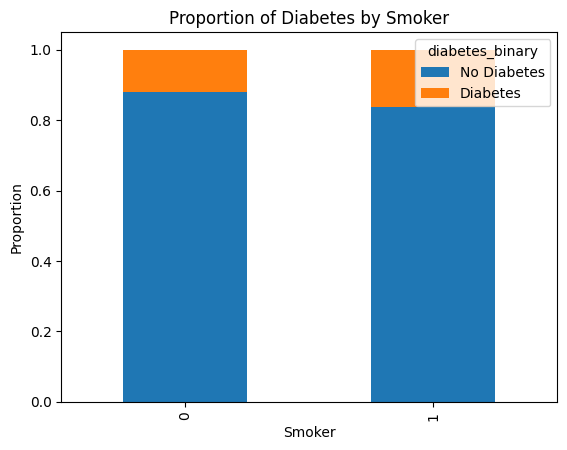

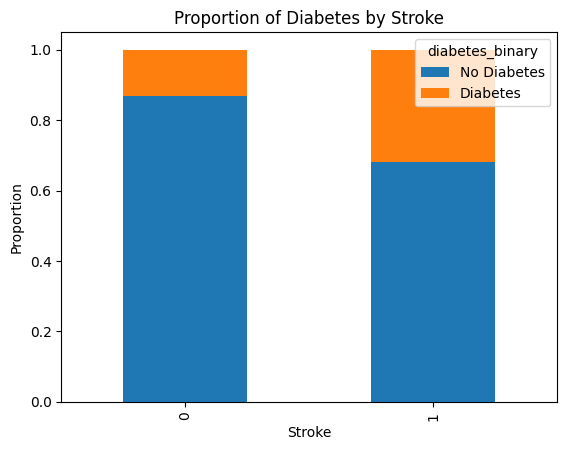

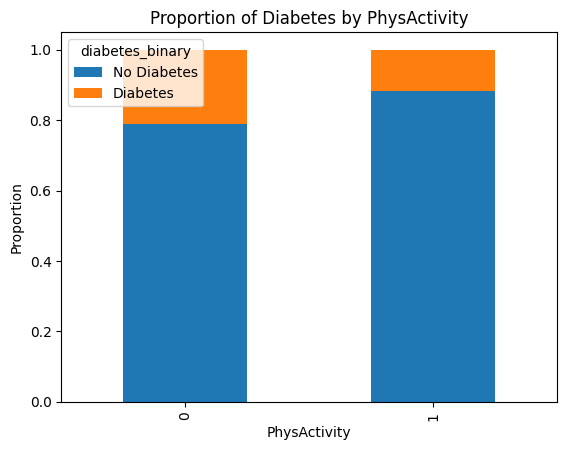

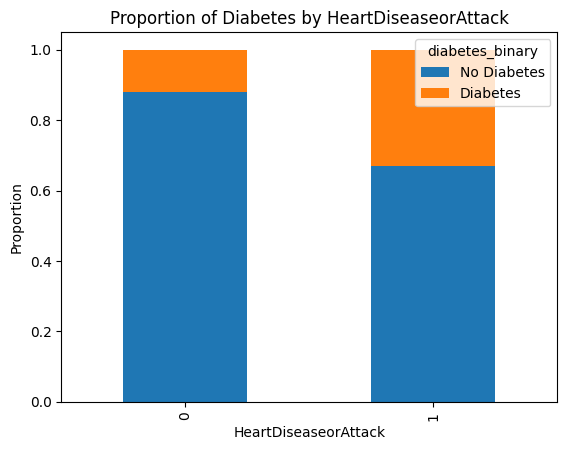

In [ ]:
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'PhysActivity', 'HeartDiseaseorAttack']

for col in binary_cols:
    ctab = pd.crosstab(df[col], df['Diabetes_binary'], normalize='index')
    ctab.plot(kind='bar', stacked=True)
    plt.title(f"Proportion of Diabetes by {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.legend(["No Diabetes", "Diabetes"], title="diabetes_binary")
    plt.show()


## **Age Grouping vs Diabetes Rate**

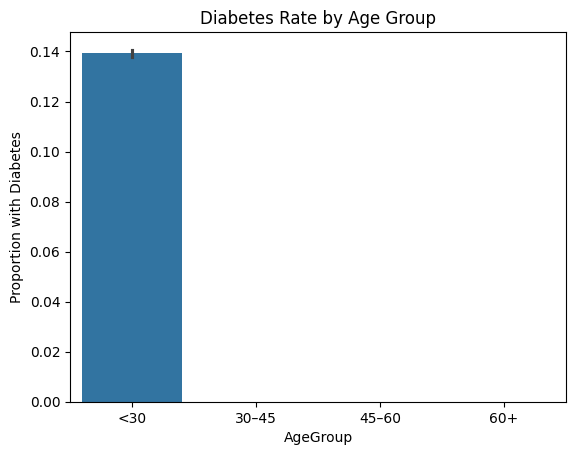

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=["<30", "30–45", "45–60", "60+"])

sns.barplot(x='AgeGroup', y='Diabetes_binary', data=df)
plt.title("Diabetes Rate by Age Group")
plt.ylabel("Proportion with Diabetes")
plt.show()


## **Heatmap of Feature Variability**

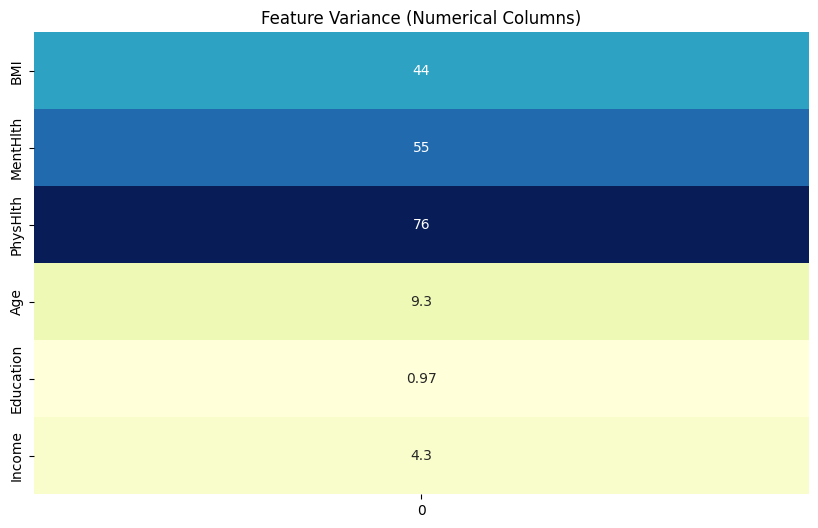

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].var().to_frame(), annot=True, cmap="YlGnBu", cbar=False)
plt.title("Feature Variance (Numerical Columns)")
plt.show()


## **Correlation of Binary Features with Diabetes**

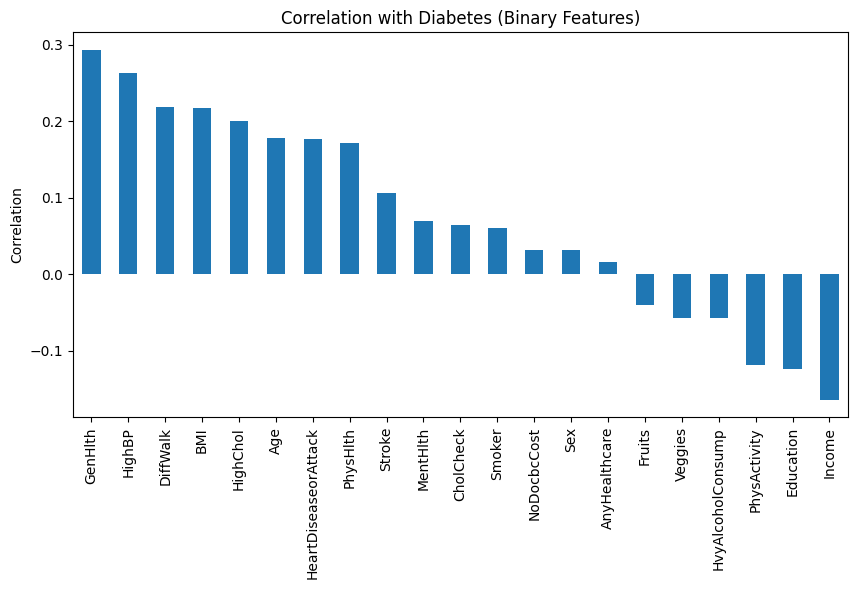

In [ ]:
corrs = df.drop('AgeGroup', axis=1).corr()['Diabetes_binary'].sort_values(ascending=False)
corrs.drop('Diabetes_binary').plot(kind='bar', figsize=(10,5))
plt.title("Correlation with Diabetes (Binary Features)")
plt.ylabel("Correlation")
plt.show()

## **Feature Interaction Effects**

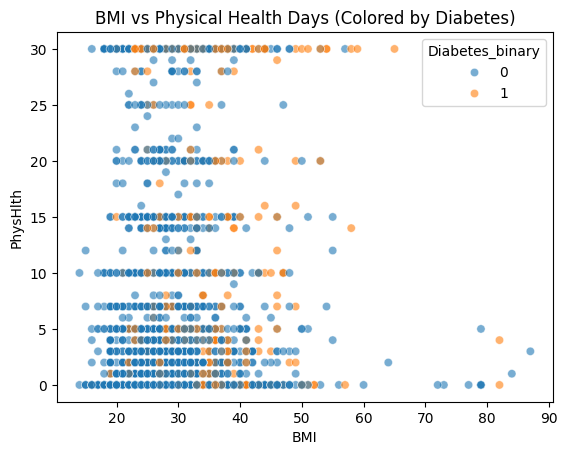

In [ ]:
# BMI vs Physical Health, colored by diabetes
sns.scatterplot(data=df.sample(5000), x='BMI', y='PhysHlth', hue='Diabetes_binary', alpha=0.6)
plt.title("BMI vs Physical Health Days (Colored by Diabetes)")
plt.show()


## **Multicollinearity Check**

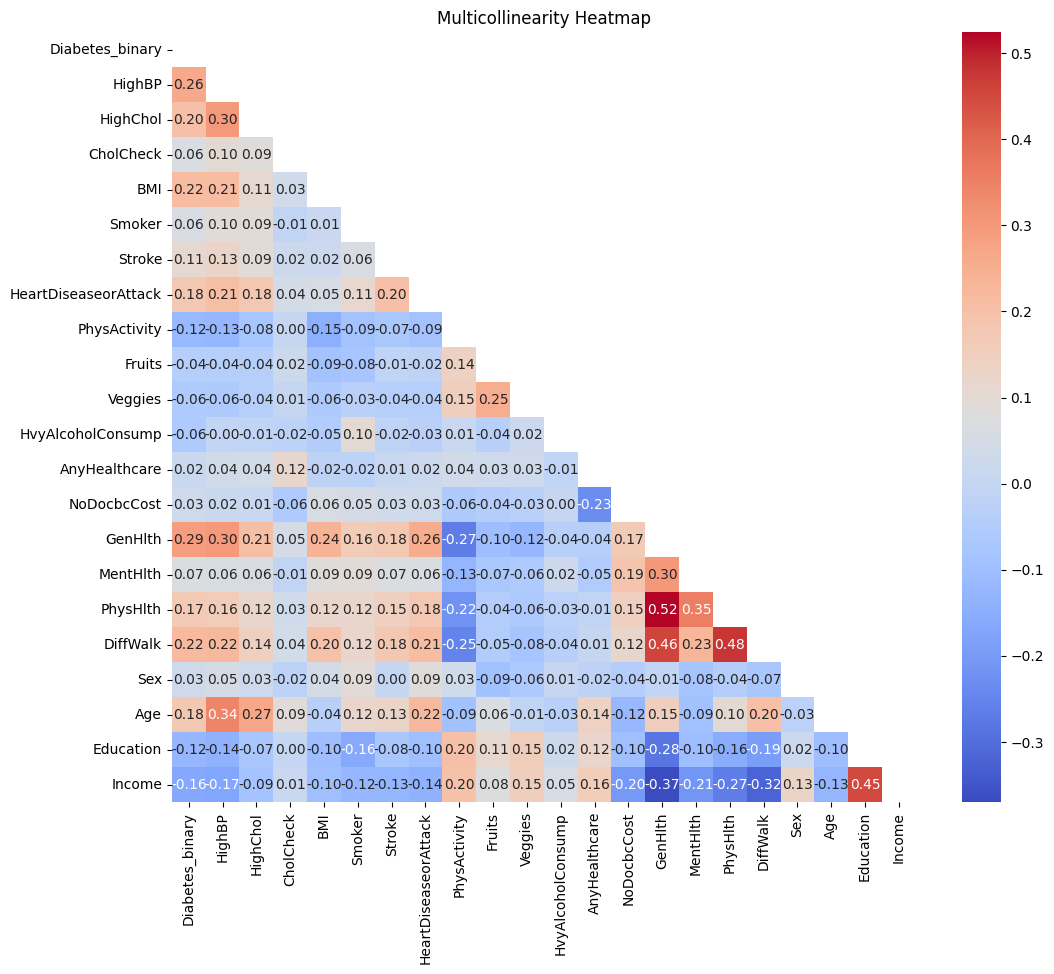

In [ ]:
plt.figure(figsize=(12,10))
# Exclude the non-numeric 'AgeGroup' column before calculating correlation
mask = np.triu(df.drop('AgeGroup', axis=1).corr())
sns.heatmap(df.drop('AgeGroup', axis=1).corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Multicollinearity Heatmap")
plt.show()

## **Countplots of Binary Features**

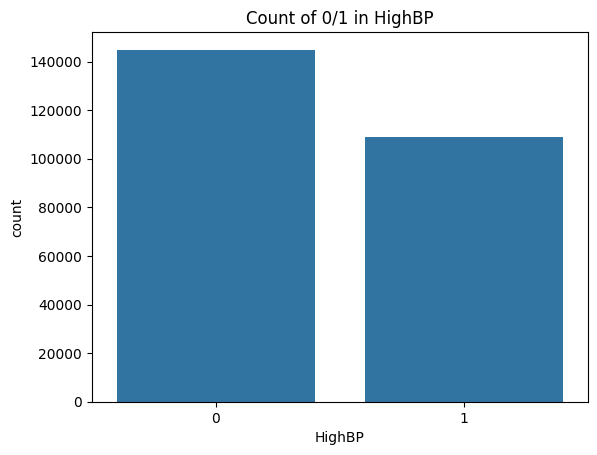

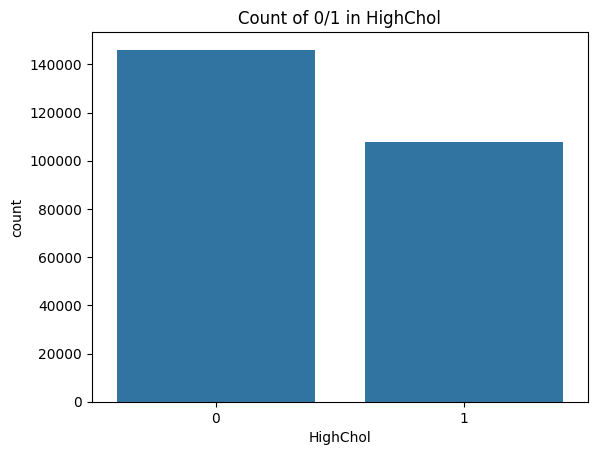

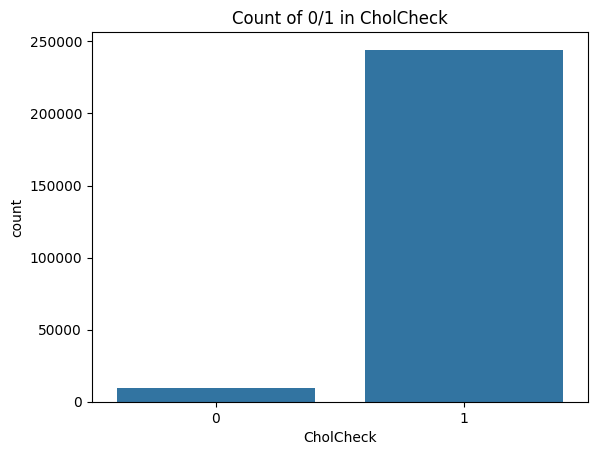

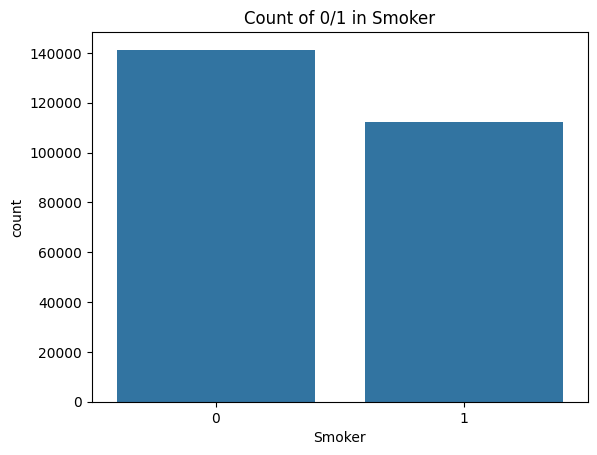

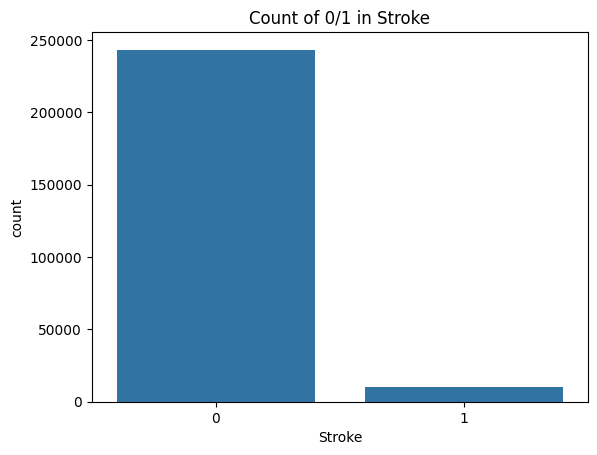

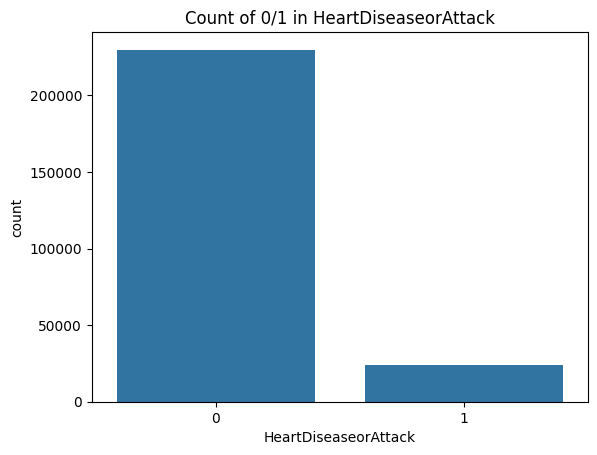

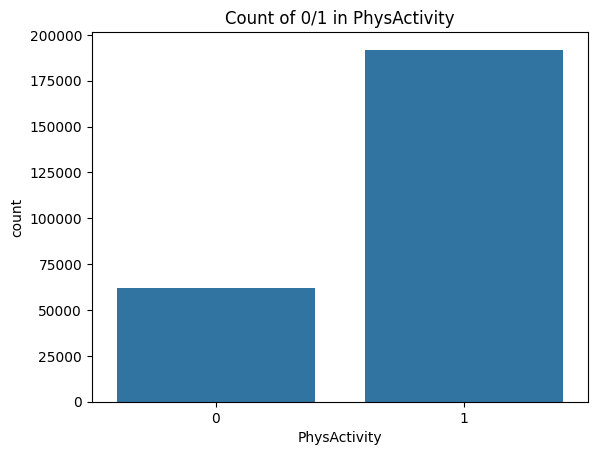

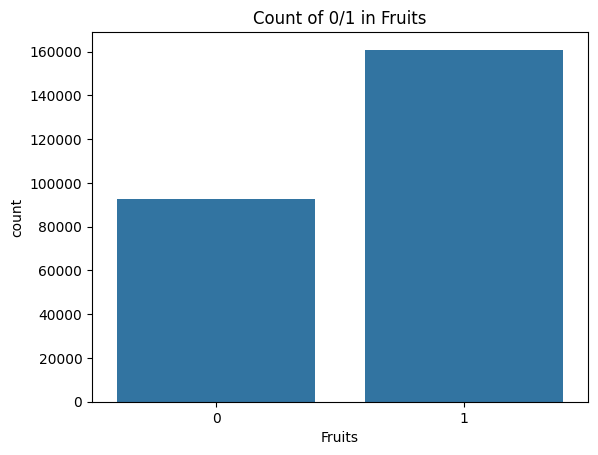

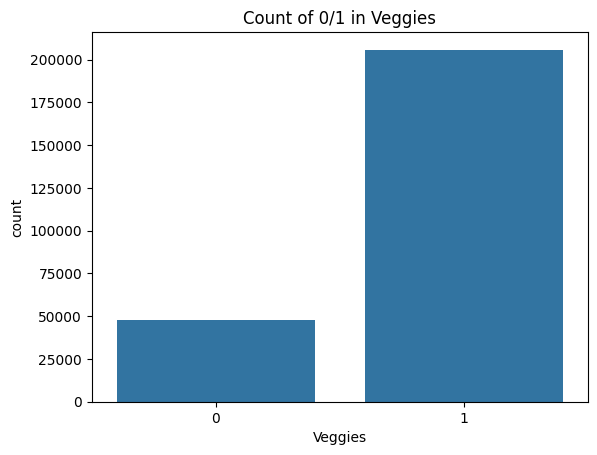

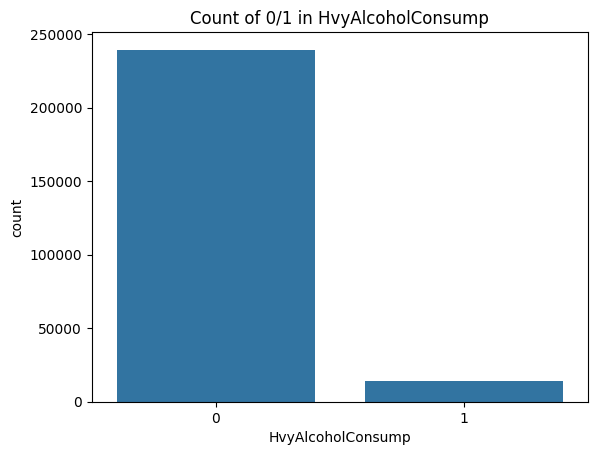

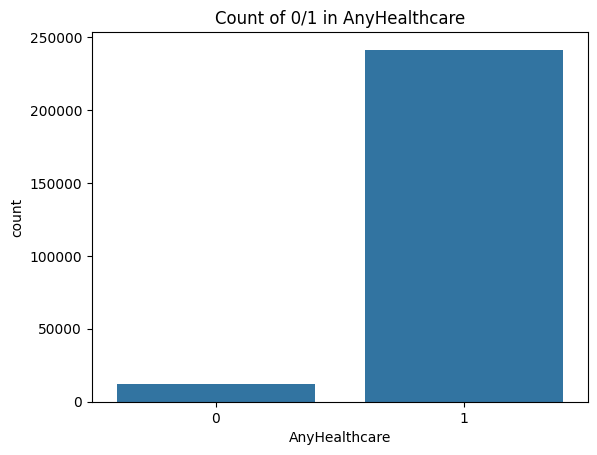

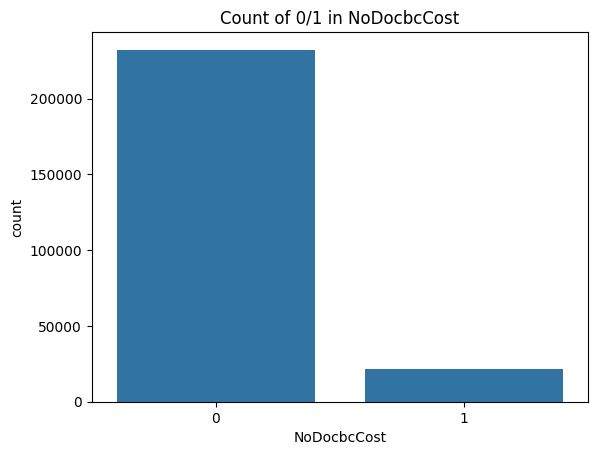

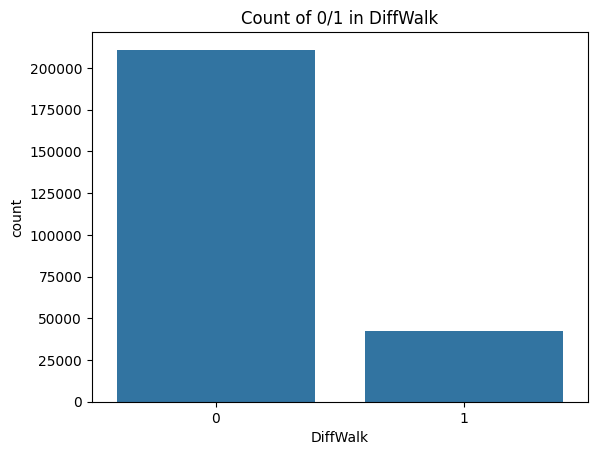

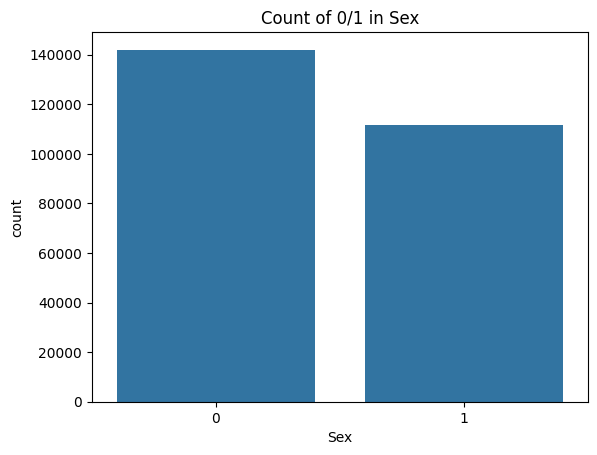

In [ ]:
binary_features = [col for col in df.columns if df[col].nunique() == 2 and col != 'Diabetes_binary']

for col in binary_features:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of 0/1 in {col}")
    plt.show()


## **Grouped Box Plots**

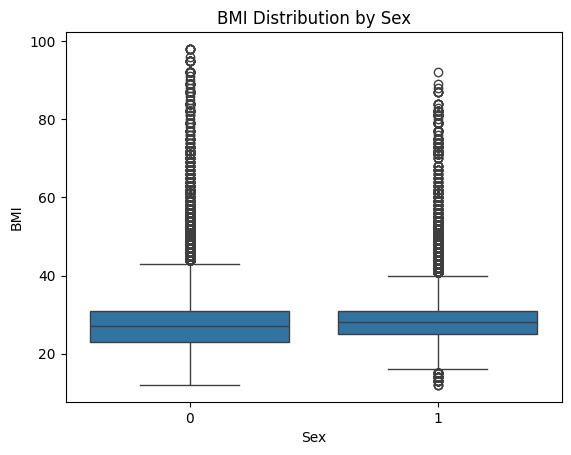

In [ ]:
sns.boxplot(x='Sex', y='BMI', data=df)
plt.title("BMI Distribution by Sex")
plt.show()

## **Chi-Square Test for Binary vs Target**

In [ ]:
for col in binary_features:
    table = pd.crosstab(df[col], df['Diabetes_binary'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f}")

HighBP: p-value = 0.0000
HighChol: p-value = 0.0000
CholCheck: p-value = 0.0000
Smoker: p-value = 0.0000
Stroke: p-value = 0.0000
HeartDiseaseorAttack: p-value = 0.0000
PhysActivity: p-value = 0.0000
Fruits: p-value = 0.0000
Veggies: p-value = 0.0000
HvyAlcoholConsump: p-value = 0.0000
AnyHealthcare: p-value = 0.0000
NoDocbcCost: p-value = 0.0000
DiffWalk: p-value = 0.0000
Sex: p-value = 0.0000


###  EDA Summary: Key Insights from the Dataset

1. **Class Distribution**: The dataset is slightly imbalanced, with more non-diabetic individuals than diabetic ones. This should be considered during model evaluation.

2. **Binary Health Indicators**: Features like `HighBP`, `HighChol`, `HeartDiseaseorAttack`, and `PhysActivity` show strong differences in diabetes prevalence and are likely important predictors.

3. **Numerical Features**:
   - `BMI` shows a right-skewed distribution and higher median values among diabetic individuals.
   - `MentHlth` and `PhysHlth` (days of poor mental and physical health) are higher in diabetic cases, suggesting a possible link.
   - `Age` and `Education` also show visible trends, with older and less-educated individuals having higher diabetes rates.

4. **Correlations**:
   - The strongest positive correlations with diabetes are seen in `HighBP`, `HighChol`, and `HeartDiseaseorAttack`.
   - Numerical features generally have weak linear correlations with each other, indicating low multicollinearity.

5. **Feature Interactions**:
   - Scatter plots show that combinations like `BMI` + `PhysHlth` or `Age` + `MentHlth` may reveal important interactions.
   - Age group analysis suggests increasing diabetes risk with age, particularly after 45 years.

6. **Chi-Square Tests**: Most binary features are statistically significantly associated with diabetes (`p < 0.05`), especially `PhysActivity`, `HighBP`, and `Smoker`.

7. **No Missing Values**: The dataset is clean and well-structured — no imputation is required.

These insights will guide the feature selection, model choice, and evaluation strategy in the next phase.


# **Feature Engineering**

## **Scaling Numerical Features (for distance-based models)**

Standardize features like BMI, Age, Income for models like Logistic Regression, KNN, SVM

In [ ]:
# Select numerical columns
num_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## **Creating Interaction Features (optional, boosts linear models)**

Helps models detect patterns like: “older + high BMI = high risk”

In [ ]:
df['BMI_x_PhysHlth'] = df['BMI'] * df['PhysHlth']
df['Age_x_Education'] = df['Age'] * df['Education']

## **Creating Categorical Buckets from Continuous Variables**

Turns age into categories to find clearer trends (also works for tree models)

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=["<30", "30–45", "45–60", "60+"])
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

## **Remove Redundant or Low-Variance Features**

Remove features that are constant or almost constant

Helps reduce noise and improve generalization

In [ ]:
selector = VarianceThreshold(threshold=0.01)
df = df.loc[:, selector.fit(df).get_support()]

## **After Feature Engineering**

In [ ]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# **10 Supervised ML Models to Train**

| Model                      | Why It’s Kept / Added                                 |
| -------------------------- | ----------------------------------------------------- |
| **LogisticRegression**     | Interpretable, fast, good baseline                    |
| **RidgeClassifier**        | Very fast, similar to SVM for linearly separable data |
| **DecisionTree (depth=5)** | Controlled complexity, fast to train                  |
| **RandomForest (n=50)**    | Ensemble, stable, faster than default (100)           |
| **ExtraTrees**             | Similar to RF but faster for some tasks               |
| **Bagging(LR)**            | Lightweight ensemble with LogisticRegression          |
| **Naive Bayes**            | Instant training, great for comparison                |
| **XGBoost (n=25)**         | Kept but tuned down for speed                         |
| **DummyClassifier**        | Shows how well models outperform a random guess       |



## **Define a Helper Function to Train & Evaluate**

In [7]:
# Recreate train/test sets
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation function
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}: Acc={acc:.2f}, Prec={prec:.2f}, Recall={rec:.2f}, F1={f1:.2f}")
    return [name, acc, prec, rec, f1]

## **Train All 10 Models**

In [15]:
results = []

models = [
    ("Logistic Regression", LogisticRegression(max_iter=500, class_weight='balanced')),
    ("Ridge Classifier", RidgeClassifier(class_weight='balanced')),
    ("Decision Tree", DecisionTreeClassifier(max_depth=6, class_weight='balanced')),
    ("Random Forest", RandomForestClassifier(n_estimators=50, max_depth=6, class_weight='balanced')),
    ("Extra Trees", ExtraTreesClassifier(n_estimators=50, max_depth=6, class_weight='balanced')),
    # Changed base_estimator to estimator
    ("Bagging (LR)", BaggingClassifier(estimator=LogisticRegression(max_iter=500, class_weight='balanced'), n_estimators=10)),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost (Fast)", xgb.XGBClassifier(n_estimators=25, scale_pos_weight=3, eval_metric='logloss', use_label_encoder=False)),  # scale_pos_weight = class imbalance ratio
    ("Dummy Stratified", DummyClassifier(strategy='stratified', random_state=42))
]

for name, model in models:
    results.append(evaluate_model(name, model))

Logistic Regression: Acc=0.73, Prec=0.31, Recall=0.78, F1=0.44
Ridge Classifier: Acc=0.73, Prec=0.31, Recall=0.79, F1=0.44
Decision Tree: Acc=0.73, Prec=0.31, Recall=0.75, F1=0.44
Random Forest: Acc=0.72, Prec=0.30, Recall=0.79, F1=0.44
Extra Trees: Acc=0.71, Prec=0.29, Recall=0.77, F1=0.42
Bagging (LR): Acc=0.73, Prec=0.31, Recall=0.78, F1=0.44
Naive Bayes: Acc=0.77, Prec=0.32, Recall=0.57, F1=0.41


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:27:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (Fast): Acc=0.82, Prec=0.39, Recall=0.59, F1=0.47
Dummy Stratified: Acc=0.76, Prec=0.14, Recall=0.14, F1=0.14


### Final Model Performance Comparison

| Model            | Accuracy | Precision | Recall | F1 Score |
|------------------|----------|-----------|--------|----------|
| Logistic Regression   | 0.73     | 0.31      | 0.78   | 0.44     |
| Ridge Classifier      | 0.73     | 0.31      | 0.79   | 0.44     |
| Decision Tree         | 0.73     | 0.31      | 0.75   | 0.44     |
| Random Forest         | 0.72     | 0.30      | 0.79   | 0.44     |
| Extra Trees           | 0.71     | 0.29      | 0.77   | 0.42     |
| Bagging (LR)          | 0.73     | 0.31      | 0.78   | 0.44     |
| Naive Bayes           | 0.77     | 0.32      | 0.57   | 0.41     |
| XGBoost (Fast)        | 0.82     | 0.39      | 0.59   | 0.47     |
| Dummy Stratified      | 0.76     | 0.14      | 0.14   | 0.14     |


## **Summary & Interpretation**

- **XGBoost (Fast)** had the best overall performance, with the highest F1 score (0.47), making it the most balanced and reliable model for predicting diabetes.
- Models like **Logistic Regression, Ridge Classifier, Decision Tree, and Bagging (LR)** all performed similarly, achieving strong recall (~78%) and moderate F1 (0.44). These are strong lightweight alternatives.
- **Naive Bayes** showed high recall (0.57) but lower precision — useful in screening scenarios where missing diabetic cases is more costly than false positives.
- The **Dummy Stratified** baseline helped confirm that real models significantly outperform random guessing (F1 = 0.14).


## **Display Results in a Table**

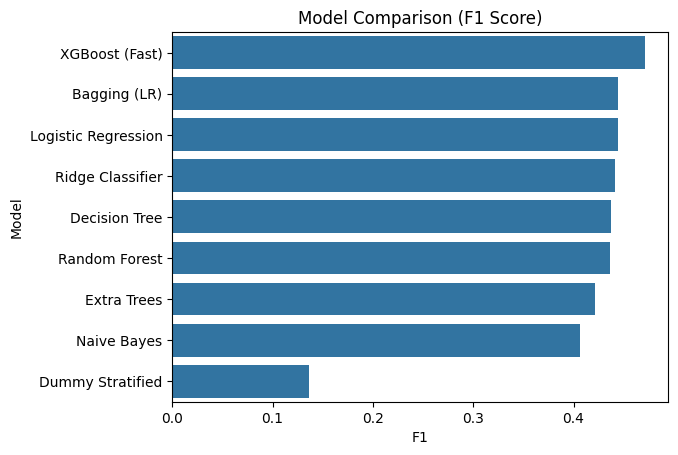

In [16]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results_df = results_df.sort_values(by="F1", ascending=False)

sns.barplot(x="F1", y="Model", data=results_df)
plt.title("Model Comparison (F1 Score)")
plt.show()

## **Radar Chart (Spider Plot)**

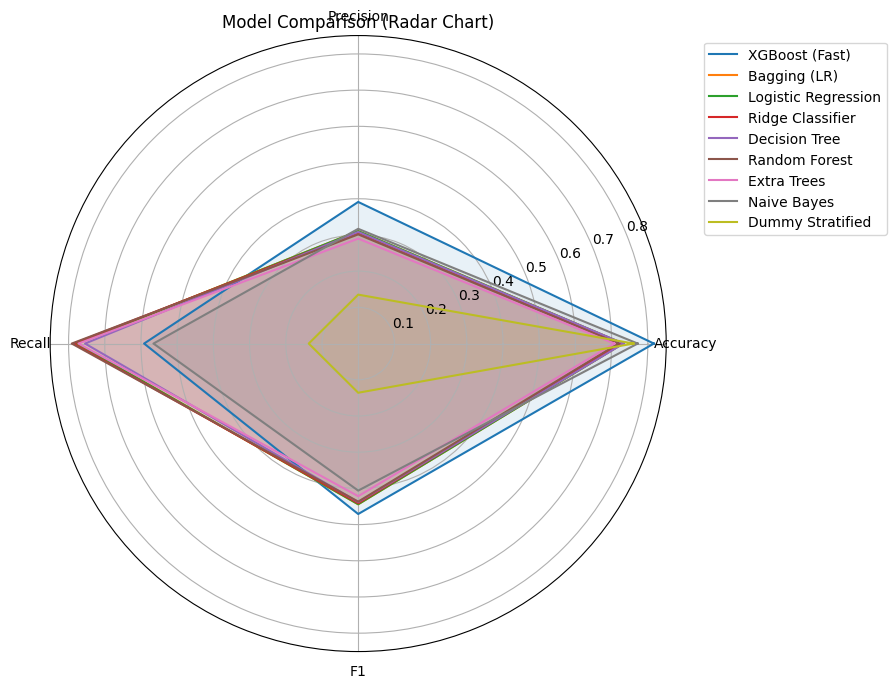

In [17]:
# Radar chart requires the same number of metrics per model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Create plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in results_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Model'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title("Model Comparison (Radar Chart)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Heatmap of Scores**

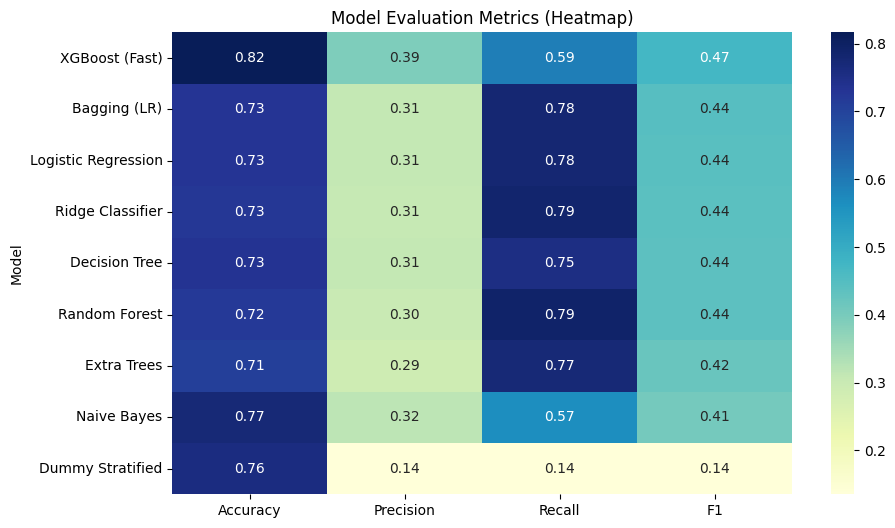

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Evaluation Metrics (Heatmap)")
plt.show()

## **Grouped Bar Chart (Multiple Metrics)**

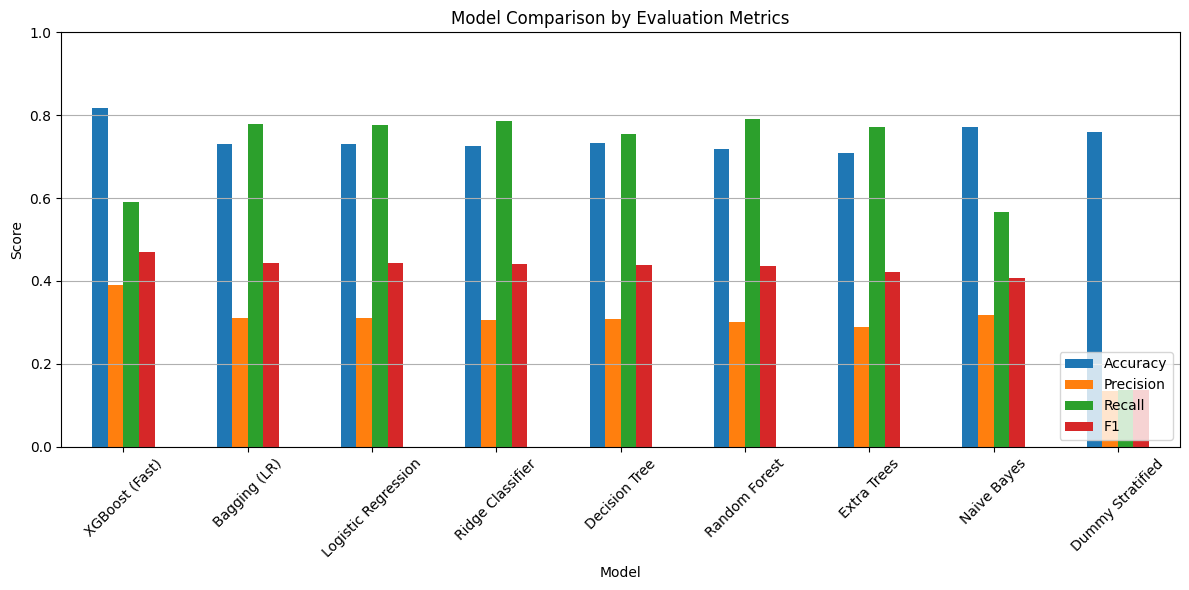

In [19]:
results_df.set_index("Model")[['Accuracy', 'Precision', 'Recall', 'F1']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison by Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## **Confusion Matrix (for each model)**

In [20]:
def plot_confusion_matrix(model, name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

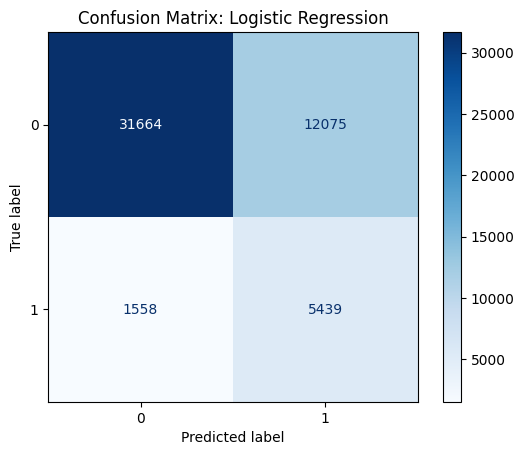

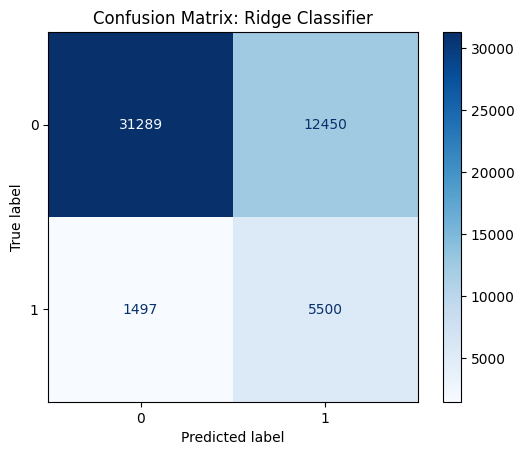

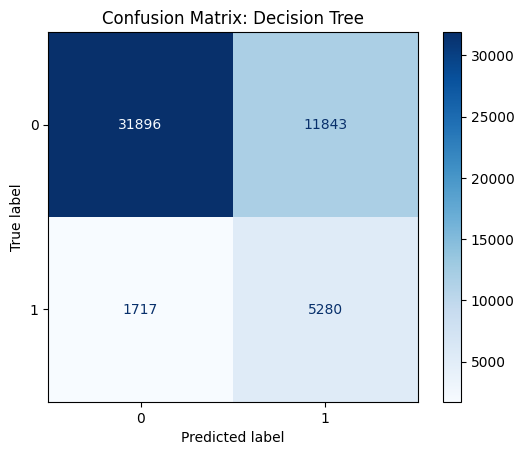

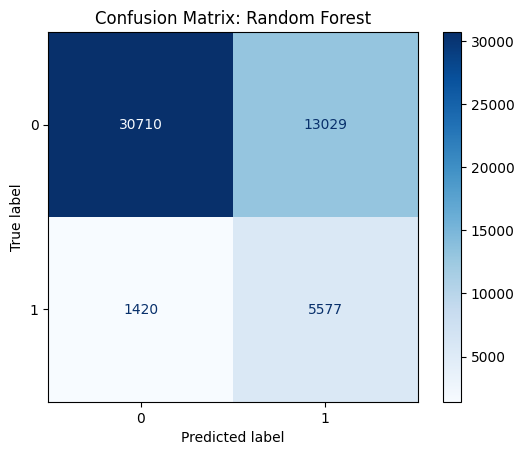

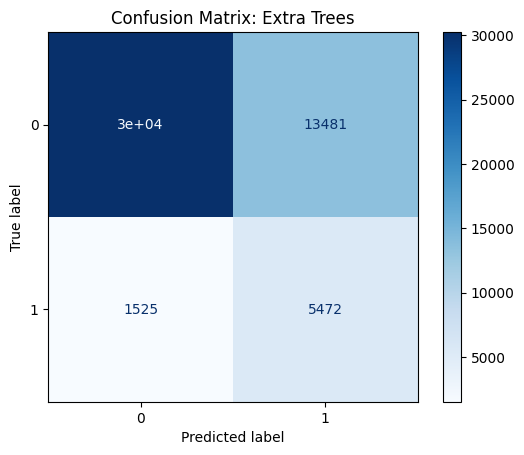

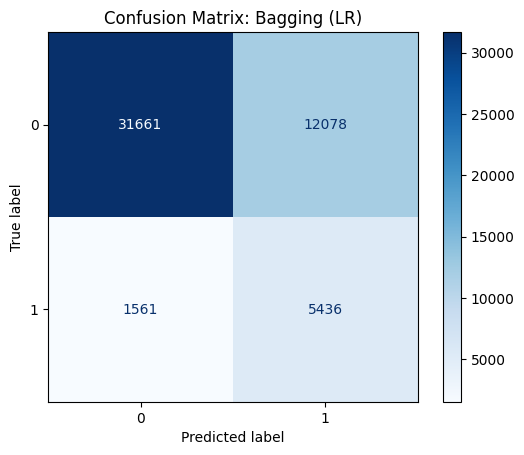

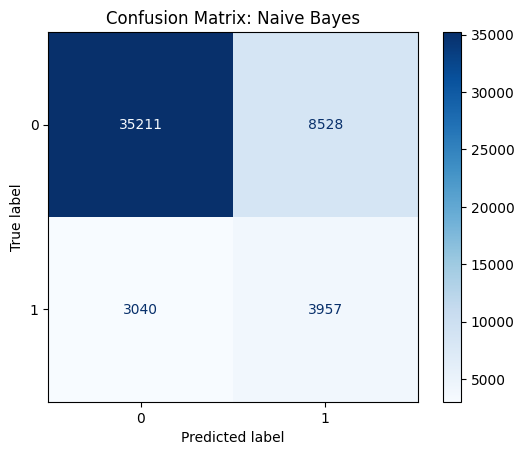

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:36:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


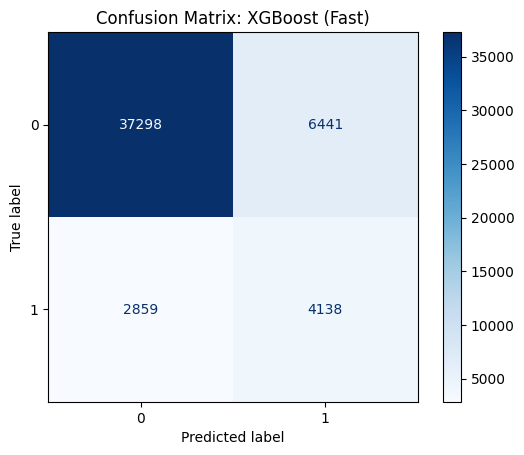

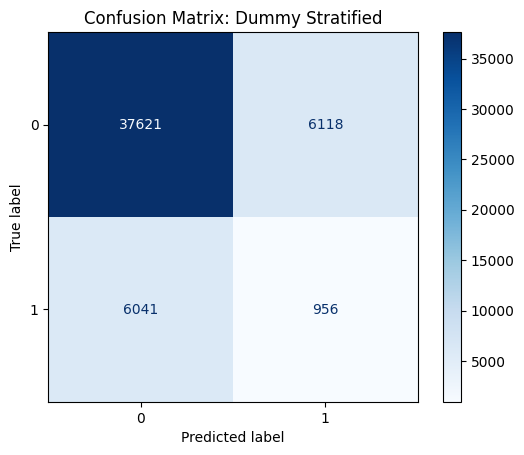

In [21]:
for name, model in models:
    model.fit(X_train, y_train)
    plot_confusion_matrix(model, name)


## **ROC Curves for All Models**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:42:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


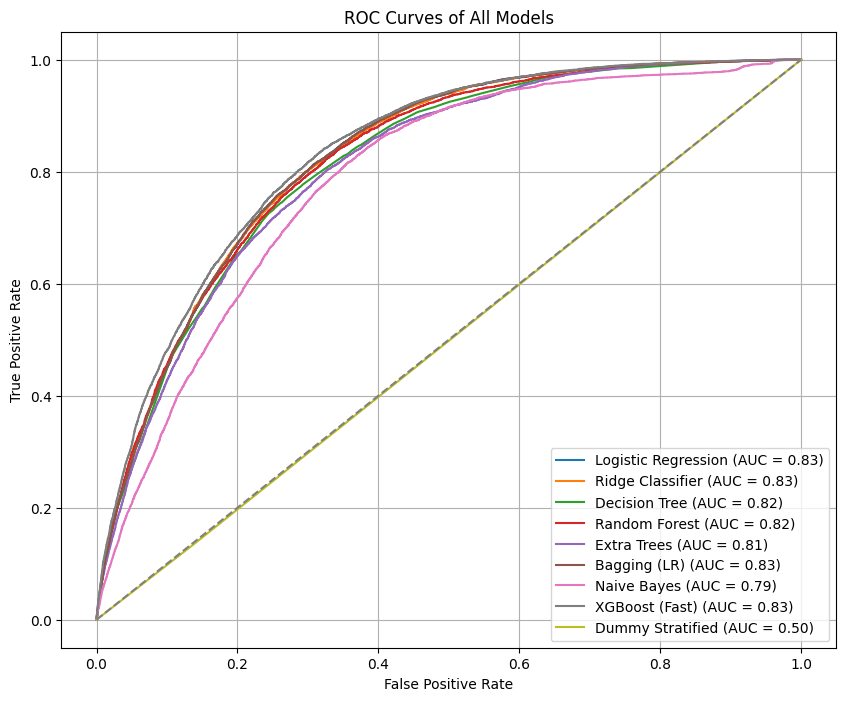

In [22]:
plt.figure(figsize=(10, 8))

for name, model in models:
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # for SVM or others
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()
